In [1]:
# Task 1: Student Pass/Fail Prediction

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
# Make sure 'student_pass_fail_dataset.csv' is in the same folder as this script
file_path = "C:\\Users\\saile\\Downloads\\student_pass_fail_dataset.csv"
data = pd.read_csv(file_path)

# Display first 5 rows
print("First 5 rows of dataset:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


# Print actual column names to help with debugging
print("\nColumn names in the dataset:")
print(list(data.columns))

# Update these column names to match your CSV file exactly
X = data[['Study_Hours', 'Attendance']]
y = data['Pass']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

First 5 rows of dataset:
   Study_Hours  Attendance  Pass
0         12.8        76.0     1
1          1.7        69.8     0
2          3.2        36.6     0
3         18.0        93.0     1
4         12.1        83.0     1

Missing Values:
Study_Hours    0
Attendance     0
Pass           0
dtype: int64

Column names in the dataset:
['Study_Hours', 'Attendance', 'Pass']
Model Accuracy: 1.00

Confusion Matrix:
[[3 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4




Column names in the dataset:
['Review', 'Sentiment']
Model Evaluation Metrics:
Accuracy:  0.25
Precision: 0.25
Recall:    1.00
F1 Score:  0.40

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         3
    Positive       0.25      1.00      0.40         1

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4



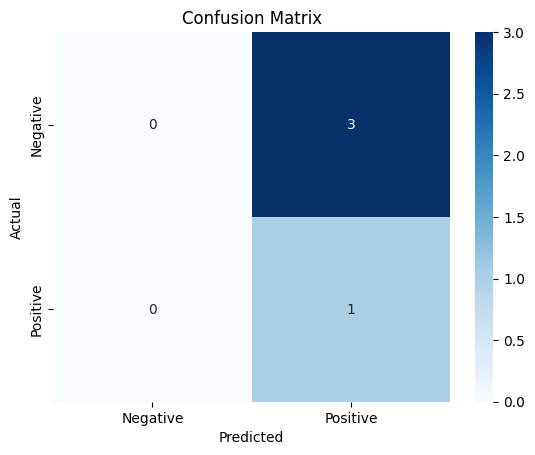


 Correctly Classified Reviews:
                                             Review  \
0  The product was excellent and delivered on time!   

                                           Cleaned  Actual  Predicted  
0  the product was excellent and delivered on time       1          1  

 Incorrectly Classified Reviews:
                                           Review  \
17    Received the wrong item, very disappointed.   
15         Too expensive for the quality offered.   
1   Terrible experience, the item arrived broken.   

                                        Cleaned  Actual  Predicted  
17    received the wrong item very disappointed       0          1  
15        too expensive for the quality offered       0          1  
1   terrible experience the item arrived broken       0          1  


In [8]:
# Task 2: Sentiment Analysis with NLP
# 1. Import Libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Uncomment the following line if you need to download stopwords for the first time
# nltk.download('stopwords')

# 2. Load Dataset
df = pd.read_csv("C:\\Users\\saile\\Downloads\\New folder\\reviews.csv")  # Make sure this file is in your working directory

# 3. Preprocess Text
def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text))  # Remove special characters
    text = text.lower()                    # Convert to lowercase
    text = text.split()                    # Tokenize
    # Commented out stopword removal to avoid empty vocabulary errors
    # text = [word for word in text if word not in stopwords.words('english')]
    text = [word for word in text if word.strip() != '']
    return ' '.join(text)

print("\nColumn names in the dataset:")
print(list(df.columns))
df['Cleaned_Review'] = df['Review'].apply(preprocess_text)
# Remove rows with empty cleaned reviews to avoid empty vocabulary errors
df = df[df['Cleaned_Review'].str.strip() != '']

# 4. Vectorize Text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Cleaned_Review']).toarray()
y = df['Sentiment']  # Already converted to 0 and 1

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 7. Make Predictions
y_pred = model.predict(X_test)

# 8. Evaluation Metrics
print("Model Evaluation Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred, zero_division=0):.2f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, zero_division=0):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"], zero_division=0))

# 9. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 10. Insights - Examples of Correct/Incorrect Predictions
results = pd.DataFrame({
    'Review': df['Review'].iloc[y_test.index],
    'Cleaned': df['Cleaned_Review'].iloc[y_test.index],
    'Actual': y_test,
    'Predicted': y_pred
})

print("\n Correctly Classified Reviews:")
print(results[results['Actual'] == results['Predicted']].head())

print("\n Incorrectly Classified Reviews:")
print(results[results['Actual'] != results['Predicted']].head())